In [1]:
import pandas as pd
import datetime as dt
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
data = pd.read_excel("online_retail_II.xlsx")

In [3]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [6]:
data= data[pd.notnull(data['Customer ID'])]

In [7]:
# Removing returned products (Invoice numbers starting with C) from the data set
data = data[~data["Invoice"].str.contains("C", na = False)]
# Removing missing values from the dataset
data.dropna(inplace = True)

In [8]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


<AxesSubplot:>

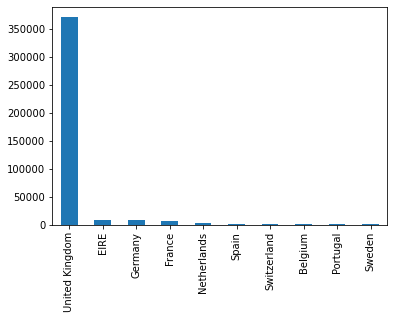

In [9]:
# Data insights
data.Country.value_counts()[:10].plot(kind='bar')

In [10]:
# Filter data for United Kingdom customer
uk_data=data[data.Country=='United Kingdom']

In [11]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370951 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      370951 non-null  object        
 1   StockCode    370951 non-null  object        
 2   Description  370951 non-null  object        
 3   Quantity     370951 non-null  int64         
 4   InvoiceDate  370951 non-null  datetime64[ns]
 5   Price        370951 non-null  float64       
 6   Customer ID  370951 non-null  float64       
 7   Country      370951 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 25.5+ MB


In [12]:
uk_data.describe()

,Quantity,Price,Customer ID
count,370951.000000,370951.000000,370951.000000
mean,11.994444,3.145220,15565.407693
std,67.394793,30.551482,1593.187209
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14215.000000
50%,4.000000,1.950000,15601.000000
75%,12.000000,3.750000,16940.000000
max,10000.000000,10953.500000,18287.000000


In [14]:
# Last invoice date
uk_data["InvoiceDate"].max() 

Timestamp('2010-12-09 20:01:00')

In [15]:
# last invoice date is assigned to today_date variable
today_date = dt.datetime(2010,12,9)

In [18]:
# Turning Customer ID variable into integer data type
uk_data["Customer ID"] = uk_data["Customer ID"].astype(int) 

<ipython-input-18-440bc338d7b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data["Customer ID"] = uk_data["Customer ID"].astype(int)


In [19]:
# Checking the Customer ID varaible has been changed into integer data type
result = uk_data["Customer ID"].dtypes
print(result)

int32


In [20]:
# Changing the InvoiceDate variable into datetime
uk_data["InvoiceDate"] = pd.to_datetime(uk_data["InvoiceDate"])

<ipython-input-20-3615e2a63d81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data["InvoiceDate"] = pd.to_datetime(uk_data["InvoiceDate"])


In [26]:
# Grouping the last invoice dates according to the Customer ID variable, subtracting them from today_date, and assigning them as recency
recency = (today_date - uk_data.groupby("Customer ID").agg({"InvoiceDate":"max"}))
# Rename column name as Recency
recency.rename(columns = {"InvoiceDate":"Recency"}, inplace = True)
# Change the values to day format
recency_uk = recency["Recency"].apply(lambda x: x.days)
recency_uk.head()

Customer ID
12346    163
12608     38
12745    120
12746    174
12747      3
Name: Recency, dtype: int64

In [27]:
# Grouping unique values of invoice date according to customer_id variable and assigning them to freq_df variable
freq_uk = uk_data.groupby("Customer ID").agg({"InvoiceDate":"nunique"}) 
# Rename column name as Frequency
freq_uk.rename(columns={"InvoiceDate": "Frequency"}, inplace=True)
freq_uk.head()

,Frequency
Customer ID,
12346,11
12608,1
12745,2
12746,1
12747,16


In [28]:
# Multiplying the prices and quantities of purchased products and assigning them to the total price variable
uk_data["TotalPrice"] = uk_data["Quantity"]

<ipython-input-28-b1a23bbda23d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data["TotalPrice"] = uk_data["Quantity"]


In [29]:
# Grouping and sum up total prices according to each Customer ID
monetary_uk = uk_data.groupby("Customer ID").agg({"TotalPrice":"sum"})
# Rename Total Price column as Monetary
monetary_uk.rename(columns={"TotalPrice":"Monetary"}, inplace=True)
monetary_uk.head()


,Monetary
Customer ID,
12346,70
12608,323
12745,467
12746,97
12747,1483


In [30]:
rfm = pd.concat([recency_uk, freq_uk, monetary_uk],  axis=1)
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,163,11,70
12608,38,1,323
12745,120,2,467
12746,174,1,97
12747,3,16,1483


In [50]:
# Working on the RFM score
quantiles = rfm.quantile(q=[0.20, 0.40, 0.60, 0.80])
quantiles

,Recency,Frequency,Monetary
0.2,13.0,1.0,122.0
0.4,34.0,2.0,268.0
0.6,68.0,3.0,539.0
0.8,175.0,6.0,1172.0


In [51]:
# Converting quantiles to a dictionary, easier to use.
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.2: 13.0, 0.4: 34.0, 0.6: 68.0, 0.8: 175.0},
 'Frequency': {0.2: 1.0, 0.4: 2.0, 0.6: 3.0, 0.8: 6.0},
 'Monetary': {0.2: 122.0, 0.4: 268.0, 0.6: 539.0, 0.8: 1172.0}}

In [52]:
rfm.describe()

,Recency,Frequency,Monetary
count,3971.000000,3971.000000,3971.000000
mean,89.201461,4.427096,1120.461093
std,97.162435,7.474990,4420.298435
min,-1.000000,1.000000,1.000000
25%,16.000000,1.000000,152.500000
50%,51.000000,2.000000,372.000000
75%,134.000000,5.000000,959.500000
max,372.000000,151.000000,125893.000000


In [53]:
segmented_rfm = rfm

In [54]:
def RScore(x,p,d):
     if x <= d[p][0.20]:
         return 1
     elif x <= d[p][0.40]:
         return 2
     elif x <= d[p][0.60]: 
         return 3
     elif x<=d[p][0.80]:
         return 4
     else:
         return 5

In [55]:
segmented_rfm['r_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['Frequency'].apply(RScore, args=('Frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['Monetary'].apply(RScore, args=('Monetary',quantiles,))
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
print(segmented_rfm.head())

             Recency  Frequency  Monetary  r_quartile  f_quartile  m_quartile  \
Customer ID                                                                     
12346            163         11        70           4           5           1   
12608             38          1       323           3           1           3   
12745            120          2       467           4           2           3   
12746            174          1        97           4           1           1   
12747              3         16      1483           1           5           5   

            RFMScore  
Customer ID           
12346            451  
12608            313  
12745            423  
12746            411  
12747            155  


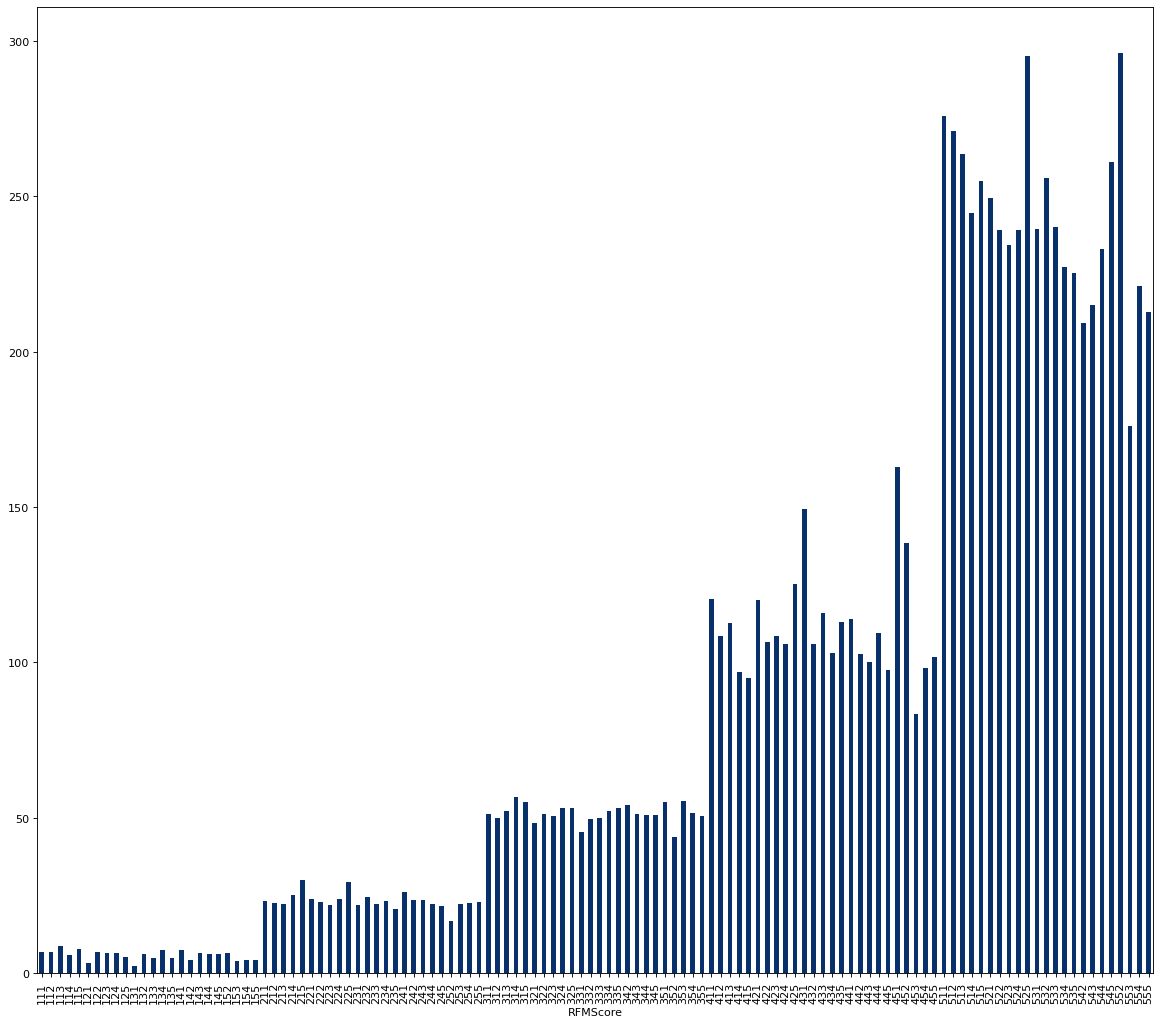

In [58]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
segmented_rfm.groupby('RFMScore').agg('Recency').mean().plot(kind='bar', colormap='Blues_r')
plt.show()

In [59]:
# Who are my best customers?
#RFMScore = 451
segmented_rfm[segmented_rfm['RFMScore']=='451'].sort_values('Monetary', ascending=False).head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMScore
Customer ID,,,,,,,
12346,163,11,70,4,5,1,451


In [61]:
# Which customers are at the verge of churning?
#Customers who's recency value is low

segmented_rfm[segmented_rfm['r_quartile'] <= 3 ].sort_values('Monetary', ascending=False).head(5)


,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMScore
Customer ID,,,,,,,
13694,7,94,125893,1,5,5,155
18102,-1,85,124216,1,5,5,155
16754,6,29,63551,1,5,5,155
17511,1,31,55107,1,5,5,155
16684,13,27,54555,1,5,5,155


In [62]:
# Who are the lost customers?
# Customers who's recency, frequency as well as monetary values are low 
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('Recency',ascending=False).head(5)


,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMScore
Customer ID,,,,,,,
15020,13,1,112,1,1,1,111
16988,13,1,115,1,1,1,111
17556,13,1,83,1,1,1,111
14721,13,1,59,1,1,1,111
16874,13,1,81,1,1,1,111


In [63]:
# Who are loyal customers
# Customers with high frequency value
segmented_rfm[segmented_rfm['f_quartile'] >= 3 ].sort_values('Monetary', ascending=False).head(5)


,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMScore
Customer ID,,,,,,,
13694,7,94,125893,1,5,5,155
18102,-1,85,124216,1,5,5,155
17940,79,6,75825,4,4,5,445
16754,6,29,63551,1,5,5,155
17511,1,31,55107,1,5,5,155
